In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import os
import glob

%matplotlib inline

# 1: Random Number Generator

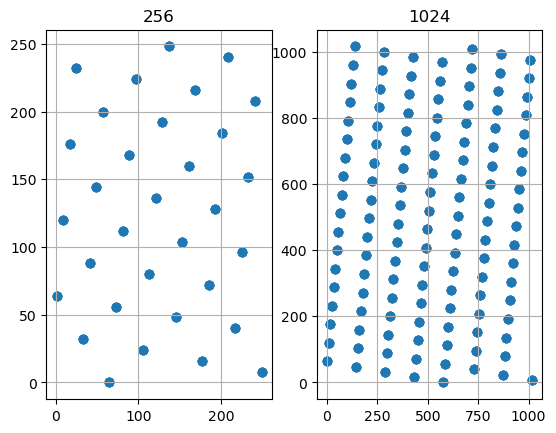

In [35]:
a = 7
c = 57

def RNG(k):
    x = np.zeros(k)
    rng_pair = []
    x[0] = 1 # random start value
    for i in range(1,k):
        x[i] = ((a*x[i-1] + c) % k)
    for j in range(k):
        if j%2 == 0:
            rng_pair.insert(-1,[x[j],x[j+1]])
    return rng_pair

test1 = RNG(256)
test2 = RNG(1024)

plt.subplot(1,2,1,title="256")
plt.scatter(*zip(*test1))
plt.grid()

plt.subplot(1,2,2,title="1024")
plt.scatter(*zip(*test2))
plt.grid()

plt.show()

In [36]:
def f1(x):
    return np.exp(-x)
def f2(x):
    return np.sin(x)
def f3(x):
    return (np.log(np.cos(x)) / x)

def trapezoidal(a,b,n,f):
    h = (b-a) / (n-1)
    return (h/2)*(f[0] + 2*sum(f[1:n-1]) + f[n-1])

def simpson(a,b,n,f):
    h = (b-a) / (n-1)
    return (h/3)*(f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])

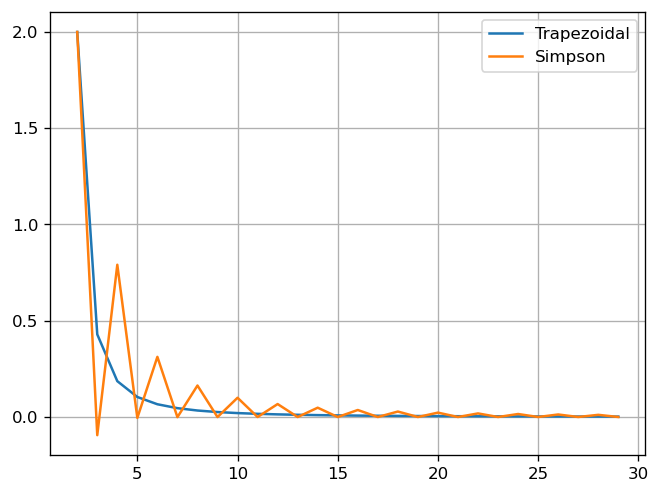

In [52]:
a_f2 = 0
b_f2 = np.pi
n_f2 = np.arange(2,30)
#x_f2 = np.linspace(a_f2,b_f2,n_f2)
#f2_func = f2(x_f2)

#print("Function sin(x):")
#print(f"Analytic value: 2 \nTrapezoidal:    {trapezoidal(a_f2,b_f2,n_f2[0],f2_func)}\nSimpson:        {simpson(a_f2,b_f2,n_f2[0],f2_func)}")

trap_n = np.zeros(len(n_f2))
simp_n = np.zeros(len(n_f2))
for i in range(len(n_f2)):
    f2s = f2(np.linspace(a_f2,b_f2,n_f2[i]))
    trap_n[i] = trapezoidal(a_f2,b_f2,n_f2[i],f2s)
    simp_n[i] = simpson(a_f2,b_f2,n_f2[i],f2s)

plt.figure(dpi=120)
plt.plot(n_f2,2-trap_n,label="Trapezoidal")
plt.plot(n_f2,2-simp_n,label="Simpson")
plt.grid()
plt.legend()
plt.show()

In [ ]:
with open("dataset.txt","w") as file:
    file.write()

def main():
    if os.path.exists("dataset.txt"):
        data = np.loadtxt("dataset.txt")

        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.loglog(data[:,0],data[:,1],'xr', label="Trapezoidal")
        plt.loglog(data[:,0],data[:,2],'xg', label="Simpson")
        #plt.loglog(data[:,0],data[:,3],'ob', label="MC by-rejection")
        #plt.loglog(data[:,0],data[:,4],'or', label="MC by-mean")
        #plt.loglog(data[:,0],data[:,5],'og', label="MC by-importance")
        ax.set_xlabel(r"N")
        ax.set_ylabel(r"Deviation")

        plt.legend(loc='best')
        plt.show()
    exit(0)

if __name__ == '__main__':
    main()